In [18]:
import pandas as pd
import numpy as np


df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0])
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


<AxesSubplot:>

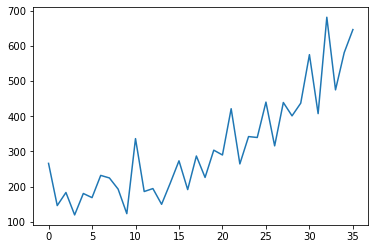

In [4]:
df['Sales'].plot()

## Auto-Correlation plot 

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

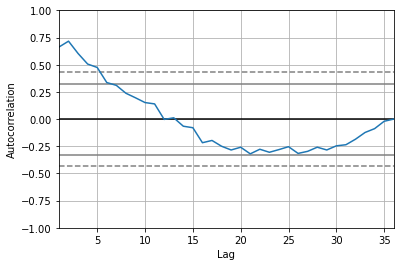

In [5]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

### Partial Autocorrelation Graph

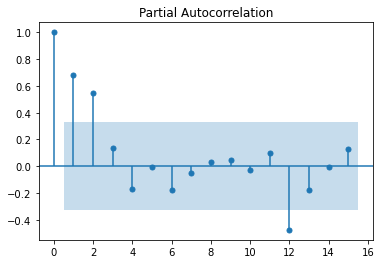

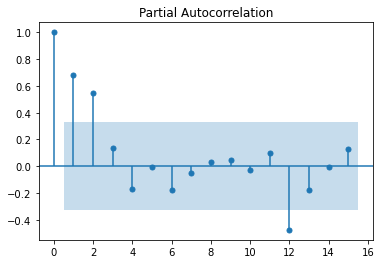

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Sales'], lags=15)

In [32]:
# Arima Model

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df['Sales'], order=(6,2,3))
model_fit = model.fit()
model_fit.summary()



C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnin

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                   34
Model:                 ARIMA(6, 2, 3)   Log Likelihood                -187.681
Method:                       css-mle   S.D. of innovations             49.340
Date:                Mon, 09 May 2022   AIC                            397.363
Time:                        13:20:39   BIC                            414.153
Sample:                             2   HQIC                           403.089
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9111      1.438      0.634      0.526      -1.907       3.729
ar.L1.D2.Sales    -2.0837      0.162    -12.829      0.000      -2.402      -1.765
ar.L2.D2.Sales    -2.4438      0.364     -6.711      0.000      -3.158      -1.730
ar.L3.D2.Sales    -2.6494      0.423     -6.264      0.000      -3.478      -1.820
ar.L4.D2.Sales    -2.3353      0.405     -5.768      0.000      -3.129      -1.542
ar.L5.D2.Sales    -1.4507      0.385     -3.771      0.000      -2.205      -0.697
ar.L6.D2.Sales    -0.5212      0.202     -2.583      0.010      -0.917      -0.126
ma.L1.D2.Sales     0.0134      0.165      0.082      0.935      -0.309       0.336
ma.L2.D2.Sales     0.0134      0.164      0.082      0.935      -0.309       0.336
ma.L3.D2.Sales     1.0000      0.162      6.165      0.000       0.682       1.318
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.3031           -0.9830j            1.0286           -0.2024
AR.2            0.3031           +0.9830j            1.0286            0.2024
AR.3           -1.0293           -0.2542j            1.0602           -0.4615
AR.4           -1.0293           +0.2542j            1.0602            0.4615
AR.5           -0.6656           -1.0818j            1.2701           -0.3378
AR.6           -0.6656           +1.0818j            1.2701            0.3378
MA.1           -1.0000           -0.0000j            1.0000           -0.5000
MA.2            0.4933           -0.8699j            1.0000           -0.1679
MA.3            0.4933           +0.8699j            1.0000            0.1679
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

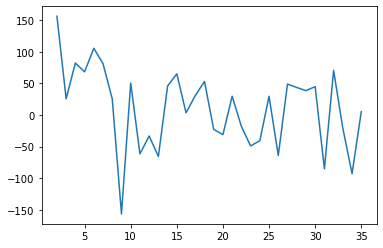

In [33]:
residuals = model_fit.resid
residuals.plot()

In [34]:
residuals.describe()

count     34.000000
mean      10.637995
std       64.788118
min     -156.735142
25%      -32.780069
50%       27.609113
75%       50.095471
max      156.388853
dtype: float64

### Variations
* **ARIMA** - <br />
    model = ARIMA(df['Sales'], order=(q,d,p)) <br />
* **Autoregression** - <br />
    model = ARIMA(df['Sales'], order=(p,d,0)) <br />
* **Moving Avaerage Model** - <br />
    model = ARIMA(df['Sales'], order=(0,d,q)) <br />

In [36]:
output = model_fit.forecast()
output

(array([653.93750326]),
 array([49.33956394]),
 array([[557.23373492, 750.6412716 ]]))

## Walk Forward ARIMA

In [37]:
train_size = int(df.shape[0]*0.7)
train, test = df.Sales[0:train_size], df.Sales[train_size:]

In [38]:
data = train
predict =[]
for t in test:
    model = ARIMA(data, order=(5,1,0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data, t)
    data = pd.Series(data)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


387.37635502672316
348.1542240654271
386.3087356400106
356.08213522421937
446.37949921543714
394.7373195755154
434.9155186041352
507.9233369245273
435.4829759326345
652.7437939296194
546.343410329999


predict

In [40]:
#Mean Squared Error

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

8119.128212443171